In [214]:
import numpy as np
from numpy import array as npa
from numpy import transpose as tr
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import sklearn
from sklearn.datasets import make_moons, make_blobs, make_s_curve
import sklearn.datasets as dt

In [3]:
#Testing
e = np.exp(1)
yt = npa([1,0])
smf = npa([[e, 1/e], [e,1/e]])
"""print smf
print yt
print -np.log(smf[1,yt[:2]])
print '[-1*log(1/e) -> 1st, -1*log(e) -> 0th]'"""
print yt, '\nsmf:\n', smf, '\n->', smf[1,yt[:2]]

[1 0] 
smf:
[[ 2.71828183  0.36787944]
 [ 2.71828183  0.36787944]] 
-> [ 0.36787944  2.71828183]


In [4]:
#conversion from 2 dimentional data to 3 dimentional
x = npa([[1,1],[2,2]])
y = npa([[1,2,3],[4,5,6]])
print x.dot(y)

[[ 5  7  9]
 [10 14 18]]


(500, 2)


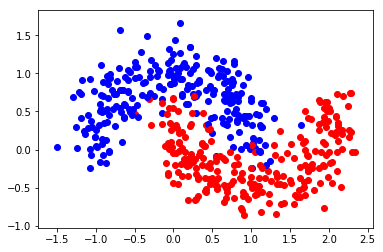

In [194]:
a = np.array([1,2])
#Supervised
xt, lab = make_moons(n_samples = 600, noise=0.2)
xtest = xt[500:]
testlab = lab[500:]

xt = xt[:500]
lab = lab[:500]

print xt.shape
for i in range(xt.shape[0]):
    if lab[i] == 1:
        plt.scatter(xt[i,0],xt[i,1], color='r')
    else:
        plt.scatter(xt[i,0],xt[i,1], color = 'b')

Lets make a neural net now:

we are going to make a 2 layer network

2 inputs - x and y coordinate

k hidden inputs (or dimentions)

2 outputs - which class does that point belong to

In [195]:
#X(MxN)
xm = x.shape[0] #Enter number of trainibg inputs
xn = x.shape[1] #No. of dimentions in input data, No. of attributes in x

k=3 #No. of hidden dimentions
#ym = No of outputs
yn = 2 #here

model = {
    'w1': np.random.randn(xn,k), #z1 = x(xm,xn)*w1(xn,k)
    'b1': np.random.randn(1,k),
    'w2': np.random.randn(k,yn),  #z2 = z1(xm,k)*(k,ym)
    'b2': np.random.randn(1,yn)
}

z1 = x.dot(model['w1']) + model['b1']
print z1.shape
z2 = z1.dot(model['w2']) + model['b2']
print z2.shape
sfm = np.exp(z2)/(np.sum(np.exp(z2), axis=1, keepdims=True)) #axis = 1 is important as were recieveing multiple outputs 
print sfm.shape

#softmax check
print np.exp(z2[0,0])/(np.exp(z2[0,0])+np.exp(z2[0,1]))
print sfm[0]

act1 = 0

(2, 3)
(2, 2)
(2, 2)
0.0815137060768
[ 0.08151371  0.91848629]


In [196]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    X = xt
    y = lab
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    print Z
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    
#plot_decision_boundary(lambda x: nn.predict(x))

In [202]:
class NeuralNet:
    
    def __init__(self, model=None):
        self.mdl = model
        self.alpha = 0.01
        self.nbepoch = 10000
        if self.mdl is None:
            self.w1 = np.random.randn(xn,k)
            self.b1 = np.random.randn(1,k)
            self.w2 = np.random.randn(k,yn)
            self.b2 = np.random.randn(1,yn)
        else:
            self.w1 = self.mdl['w1']
            self.b1 = self.mdl['b1']
            self.w2 = self.mdl['w2']
            self.b2 = self.mdl['b2'] 
    
    def sigmoid(self, arr):
        return 1./(1. + np.exp(-arr))
    
    def dsigmoid(self, arr):
        sig = self.sigmoid(arr)
        return sig*(1 - sig)
        
    def loss(self,smf,yt):
        dataloss = -np.log(smf[range(yt.shape[0]),yt] + 1e-7) #when yt = 0 return -log(smf[0]) else return -log(smf[1])
        #print dataloss[:10]
        return 1./yt.shape[0] * np.sum(dataloss)
    
    def fit(self,xt,yt, k=3, print_loss=True):
        for i in xrange(self.nbepoch):
            self.z1 = xt.dot(self.w1) + self.b1
            act1 = self.sigmoid(self.z1)
            self.z2 = act1.dot(self.w2) + self.b2
            smf = np.exp(self.z2)/(np.sum(np.exp(self.z2), axis=1, keepdims=True))
            #print dz2[:4] print yt[:4] print dz2[:4]
            
            dz2 = npa(smf)
            dz2[range(yt.shape[0]),yt] -= 1
            dw2 = (act1.T).dot(dz2)
            db2 = np.sum(dz2, axis=0, keepdims=True)
            
            dz1 = dz2.dot(self.w2.T) * (1 - act1) * act1
            dw1 = np.dot(xt.T, dz1)
            db1 = np.sum(dz1, axis=0, keepdims=True)
            
            self.w1 += -self.alpha * dw1
            self.b1 += -self.alpha * db1
            self.w2 += -self.alpha * dw2
            self.b2 += -self.alpha * db2
            
            if print_loss and i % 200 == 0:
                print "Loss after iteration %i: " %(i), self.loss(smf,yt)                
            
        self.mdl = { 'w1': self.w1, 'b1': self.b1, 'w2': self.w2, 'b2': self.b2}
        return self.mdl
        
    def predict(self,test, printEnable = False):
        z1 = test.dot(self.w1) + self.b1
        act1 = self.sigmoid(z1)
        z2 = act1.dot(self.w2) + self.b2
        sfm = np.exp(z2)/(np.sum(np.exp(z2), axis=1, keepdims=True))
        prediction = sfm.argmax(axis=1)
        
        if printEnable:
            print 'z1:  ', z1
            print 'act1:', act1
            print 'z2:  ', z2
            print 'sfm: ', sfm
            
        return prediction
    

In [203]:
nn = NeuralNet()
nn.nbepoch = 1
mdl = nn.fit(xt,lab)

Loss after iteration 0:  0.881210793123


Loss after iteration 0:  0.260234289939
Loss after iteration 200:  0.112323033747
Loss after iteration 400:  0.0968152790095
Loss after iteration 600:  0.0953438048756
Loss after iteration 800:  0.0948702289058
[0 0 0 ..., 1 1 1]


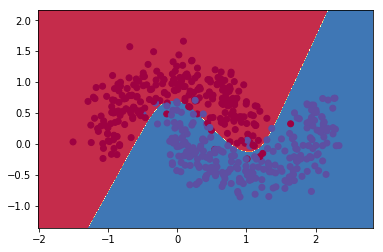

In [205]:
nn.nbepoch = 1000
nn.mdl = mdl
mdl = nn.fit(xt,lab)
plot_decision_boundary(lambda x: nn.predict(x))

In [219]:
prediction = nn.predict(xtest)
cnt = 0.0
for i in range(testlab.shape[0]):
    if testlab[i] == prediction[i]:
        cnt +=1
print cnt/testlab.shape[0]
print z1[2]

0.98


IndexError: index 2 is out of bounds for axis 0 with size 2

In [211]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(z1, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)

Object `matplot3d` not found.
